In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [13]:
df = pd.read_csv('irisdata.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Problem 2a: Plot 2nd and 3rd class: virginica and versicolor

In [14]:
def read_data(file_name):
    df = pd.read_csv(file_name)
    df = df[(df['species']=='virginica')|(df['species']=='versicolor')]
    features = df[['petal_length', 'petal_width']].to_numpy()
    classes = df[['species']].to_numpy()
    df = df[['petal_length', 'petal_width', 'species']].to_numpy()
    return df, features, classes

In [15]:
def plot_classes(class1_features, class2_features):
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Linear Decision Boundary using Sigmoid Function')
    plt.show()
    
class singleNN:
    def __init__(self, weights, b, length=3):
        self.w = np.zeros(length)
        self.w[0] = b
        self.w[1:length] = weights

    def compute_output(self, values):
        output = np.matmul(values, np.transpose(self.w[1:3])) + self.w[0]
        return 1/(1+np.exp(-output))
    
    def individual_compute_output(self, x1, x2):
        output = self.w[0] + x1*self.w[1] + x2*self.w[2]
        return sigmoid(output)
    
    def second(self, first):
        two = -(self.w[1]/self.w[2]) * first - (self.w[0]/self.w[2])
        return two
    
    def get_weights(self):
        return self.w
    
    def update_weights(self, weights):
        self.w = weights
    
def sigmoid(z):
    return 1/(1+np.exp(-z))

def classification(petal_length, petal_width, weights, b):
    sNN = singleNN(weights, b)
    z = sNN.individual_compute_output(petal_length, petal_width)
    if z<0.5:
        return 0
    else:
        return 1
    
#Problem 2c: decision boundary

def decision_boundary_plot(features, classes, weights, b):
    neuralNetwork = singleNN(weights, b)
    petal_length = np.linspace(3,7,40)
    petal_width = neuralNetwork.second(petal_length)
    
    plt.plot(petal_length, petal_width, c="black")
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Linear Decision Boundary using Sigmoid Function')
    plt.show()
    
    
#Problem 2d
def surface_plot(weights, b):
    ax = plt.axes(projection= "3d")
    x = np.linspace(0,8,100)
    y = np.linspace(0,3,100)
    x1, y1 = np.meshgrid(x, y)

    sNN = singleNN(weights, b)
    output = sNN.individual_compute_output(x1,y1)
    surface = ax.plot_surface(x1, y1, output)

    ax.set_xlabel('petal length')
    ax.set_ylabel('petal width')
    ax.set_zlabel('sigmoid value')
    ax.set_title('Problem 2d: 3D plot of Neural Network')
    plt.show()

#Problem 2e
def sigmoid_nonlinearity(data, examples, weights, b):
    sNN = singleNN(weights, b)
    output = []
    correct_answer = []
    for i in examples:
        correct_answer.append(data[i][2])
        predicted = classification(data[i][0],data[i][1], weights, b)
        if predicted == 0:
            output.append('versicolor')
        else:
            output.append('virginica')
    for j in range(len(output)):
        print("Predicted: ",output[j])
        print("Correct Answer: ",correct_answer[j])

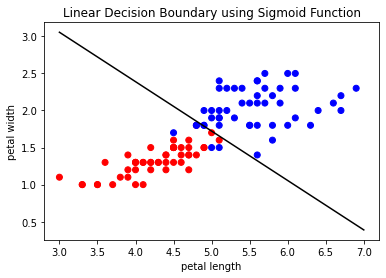

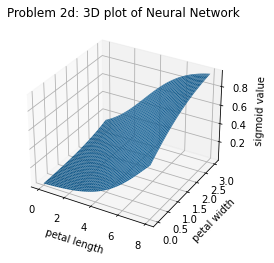

In [5]:
weights = np.array([0.6, 0.9])
b = -4.55
#decision_boundary_plot(features, classes, weights, b)
data, features, classes = read_data('irisdata.csv')
decision_boundary_plot(features, classes, weights, b)
surface_plot(weights, b)

### Problem 2e
Definitely Versicolor: [0,7,9]
Definitely Virginica: [50,81,85]
Ambiguous: [56,69,33]

In [6]:
versicolor_ex = [0,7,9]
virginica_ex = [50,81,85]
ambiguous_ex = [56,69,33]

In [7]:
print("Classification of definite versicolor examples:")
sigmoid_nonlinearity(data, versicolor_ex, weights, b)

Classification of definite versicolor examples:
Predicted:  versicolor
Correct Answer:  versicolor
Predicted:  versicolor
Correct Answer:  versicolor
Predicted:  versicolor
Correct Answer:  versicolor


In [8]:
print("Classification of definite virginica examples:")
sigmoid_nonlinearity(data, virginica_ex, weights, b)

Classification of definite virginica examples:
Predicted:  virginica
Correct Answer:  virginica
Predicted:  virginica
Correct Answer:  virginica
Predicted:  virginica
Correct Answer:  virginica


In [10]:
print("Classification of ambiguous examples:")
sigmoid_nonlinearity(data, ambiguous_ex, weights, b)

Classification of ambiguous examples:
Predicted:  versicolor
Correct Answer:  virginica
Predicted:  versicolor
Correct Answer:  virginica
Predicted:  versicolor
Correct Answer:  versicolor
